In [2]:
import time
import pandas as pd

In [3]:
df=pd.read_csv('C:/Users/CD NET/Downloads/globalterrorismdb_0718dist.csv',encoding='latin-1',low_memory=False)

In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
n_rows,n_columns= df.shape
print(n_rows)
print(n_columns)

181691
135


In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.isnull().sum()
#to calcutae nupp values

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**DataPreprocessing**

In [9]:
# Renaming Columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [10]:
dx = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [11]:
dx.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
success             0
dtype: int64

In [12]:
dx['Killed'].fillna(0, inplace=True)
dx['Wounded'].fillna(0, inplace=True)
dx['state'].fillna('Unknown', inplace=True)
dx['city'].fillna('Unknown', inplace=True)
dx['Motive'].fillna('Unknown', inplace=True)
dx['Summary'].fillna('Unknown', inplace=True)
dx['Group'].fillna('Unknown', inplace=True)
dx['Target_type'].fillna('Unknown', inplace=True)
dx['Weapon_type'].fillna('Unknown', inplace=True) 
dx['Target'].fillna('Unknown', inplace=True)
dx['success'].fillna(0, inplace=True)
dx['latitude'].fillna(0, inplace=True)
dx['longitude'].fillna(0, inplace=True)

C:\Users\CD NET\AppData\Local\Temp\ipykernel_1308\3841342060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dx['Killed'].fillna(0, inplace=True)
C:\Users\CD NET\AppData\Local\Temp\ipykernel_1308\3841342060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['Killed'].fillna(0, inplace=True)
C:\Users\CD NET\AppData\Local\Temp\ipykernel_

In [13]:
dx.isna().sum()

eventid        0
Year           0
Month          0
Day            0
Country        0
Region         0
state          0
city           0
latitude       0
longitude      0
AttackType     0
Killed         0
Wounded        0
Target         0
Summary        0
Group          0
Target_type    0
Weapon_type    0
Motive         0
success        0
dtype: int64

**2-Data Anlaysis**

In [14]:
import numpy as np
#killed
mean_killed = np.mean(dx['Killed'])
median_killed = np.median(dx['Killed'])
std_killed = np.std(dx['Killed'])
#wounded
mean_wounded = np.mean(dx['Wounded'])
median_wounded = np.median(dx['Wounded'])
std_wounded = np.std(dx['Wounded'])
#success
mea_suceess=np.mean(dx['success'])
median_success=np.median(dx['success'])
std_success=np.std(dx['success'])
# Print the results
print('Killed:')
print(f'  Mean: {mean_killed}')
print(f'  Median: {median_killed}')
print(f'  Standard deviation: {std_killed}')

print('Wounded:')
print(f'  Mean: {mean_wounded}')
print(f'  Median: {median_wounded}')
print(f'  Standard deviation: {std_wounded}')
print('Success:')
print(f'  Mean: {mea_suceess}')
print(f'  Median: {median_success}')
print(f'  Standard deviation: {std_success}')


Killed:
  Mean: 2.2668596683380025
  Median: 0.0
  Standard deviation: 11.227026186417314
Wounded:
  Mean: 2.8832963658078827
  Median: 0.0
  Standard deviation: 34.30965286998215
Success:
  Mean: 0.8895982739926579
  Median: 1.0
  Standard deviation: 0.31338982897015316


In [53]:
##Group data by various categories (e.g., year, region, attack type) and calculate aggregate statistics
totalattacked_peryear = dx.groupby('Year').size().head(5)
totalattacked_perRegion = dx.groupby('Region').size().head(5)
total_killed_peryear = dx.groupby('Year')['Killed'].sum().head(5)
total_wounded_peryear = dx.groupby('Year')['Wounded'].sum().head(5)
total_killed_perRegion = dx.groupby('Region')['Killed'].sum().head(5)
total_wounded_perRegion = dx.groupby('Region')['Wounded'].sum().head(5)
print("Total Attacks per Year:")
print(totalattacked_peryear)
print("Total Attacks per Region:")
print(totalattacked_perRegion)
print("Total Killed per Year:")
print(total_killed_peryear)
print("Total Wounded per Year:")
print(total_wounded_peryear)
print("Total Killed per Region:")
print(total_killed_perRegion)
print("Total Wounded per Region:")
print(total_wounded_perRegion)


Total Attacks per Year:
Year
1970    651
1971    471
1972    568
1973    473
1974    581
dtype: int64
Total Attacks per Region:
Region
Australasia & Oceania            282
Central America & Caribbean    10344
Central Asia                     563
East Asia                        802
Eastern Europe                  5144
dtype: int64
Total Killed per Year:
Year
1970    174.0
1971    173.0
1972    566.0
1973    370.0
1974    539.0
Name: Killed, dtype: float64
Total Wounded per Year:
Year
1970    212.0
1971     82.0
1972    409.0
1973    495.0
1974    865.0
Name: Wounded, dtype: float64
Total Killed per Region:
Region
Australasia & Oceania            150.0
Central America & Caribbean    28708.0
Central Asia                    1000.0
East Asia                       1152.0
Eastern Europe                  7415.0
Name: Killed, dtype: float64
Total Wounded per Region:
Region
Australasia & Oceania            260.0
Central America & Caribbean     8991.0
Central Asia                    2009.0
East 

In [16]:
#dentify trends over time (e.g., number of attacks per year).
df_trends_overtime=dx.groupby('Year')['AttackType'].count().sort_values(ascending=True)
df_trends_overtime.head(10)

Year
1971     471
1973     473
1972     568
1974     581
1970     651
1975     740
1976     923
1998     934
2004    1166
2003    1278
Name: AttackType, dtype: int64

In [17]:
# Most affected regions
most_affected_regions = dx['Region'].value_counts().head(5)
print("Most affected regions:")
print(most_affected_regions)

# Most affected countries
most_affected_countries = dx['Country'].value_counts().head(5)
print("\nMost affected countries:")
print(most_affected_countries)


Most affected regions:
Region
Middle East & North Africa    50474
South Asia                    44974
South America                 18978
Sub-Saharan Africa            17550
Western Europe                16639
Name: count, dtype: int64

Most affected countries:
Country
Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: count, dtype: int64


In [18]:
# prompt:  e
most_affected_countries =dx['Country'].value_counts().sort_values(ascending=False).head(5)
most_affected_countries_df = most_affected_countries.reset_index()
most_affected_countries_df.columns = ['Country', 'Number of Attacks']
print("Most affected regions:")
print(most_affected_countries_df)
most_affected_regions =dx['Region'].value_counts().sort_values(ascending=False).head(5)
most_affected_regions_df = most_affected_regions.reset_index()
most_affected_regions_df.columns = ['Region', 'Number of Attacks']
print("Most affected regions:")
print(most_affected_regions_df)



Most affected regions:
       Country  Number of Attacks
0         Iraq              24636
1     Pakistan              14368
2  Afghanistan              12731
3        India              11960
4     Colombia               8306
Most affected regions:
                       Region  Number of Attacks
0  Middle East & North Africa              50474
1                  South Asia              44974
2               South America              18978
3          Sub-Saharan Africa              17550
4              Western Europe              16639


In [19]:
#  Identify the most common attack types and targets.
most_common_attack_types = dx['AttackType'].value_counts().head(5)
most_common_targets = dx['Target'].value_counts().head(5)
print(most_common_attack_types)
print(most_common_targets)


AttackType
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: count, dtype: int64
Target
Unknown       6556
Civilians     6461
Soldiers      3157
Patrol        2942
Checkpoint    2905
Name: count, dtype: int64


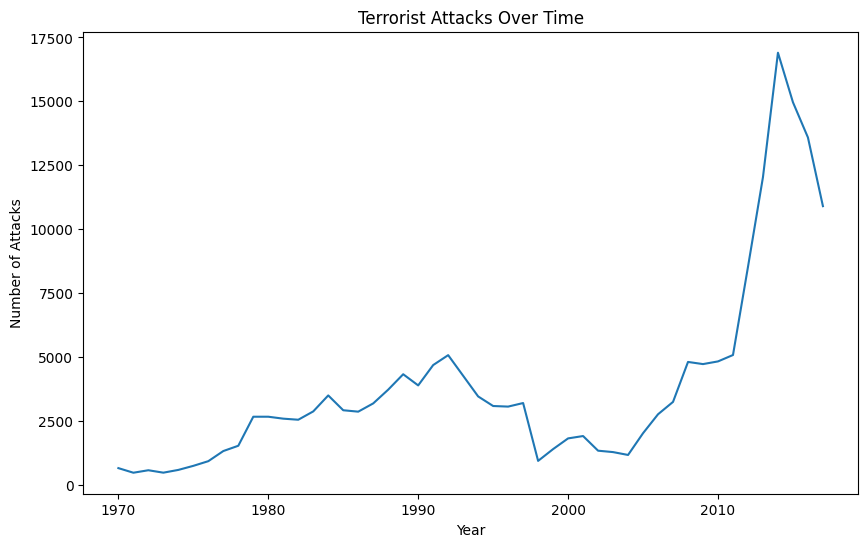

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df_trends_overtime = pd.DataFrame(df_trends_overtime)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='AttackType', data=df_trends_overtime)
plt.title("Terrorist Attacks Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")

plt.show()


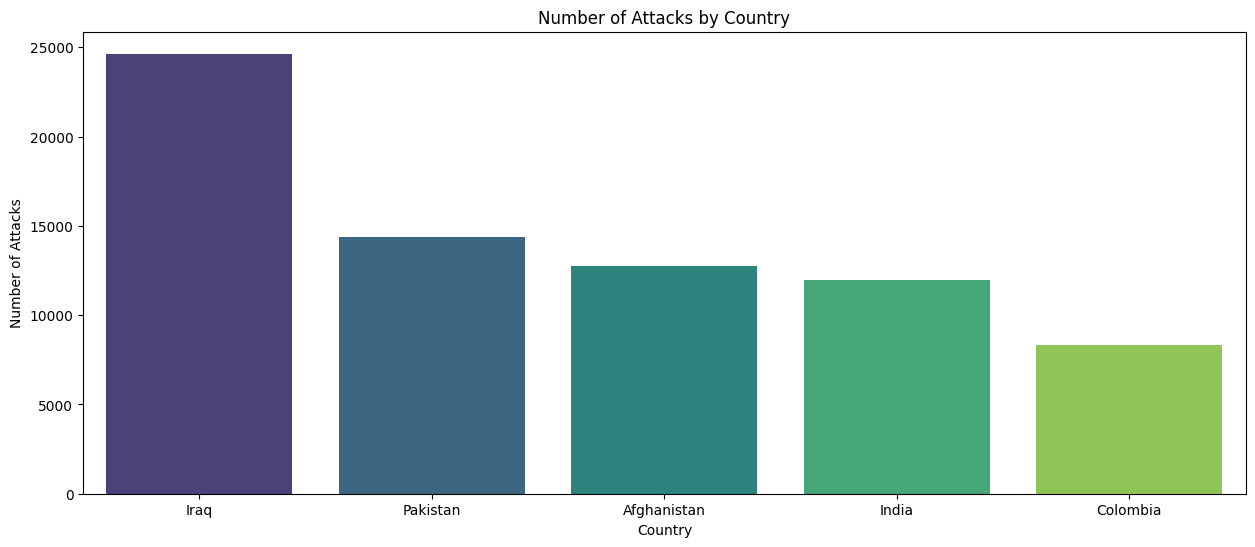

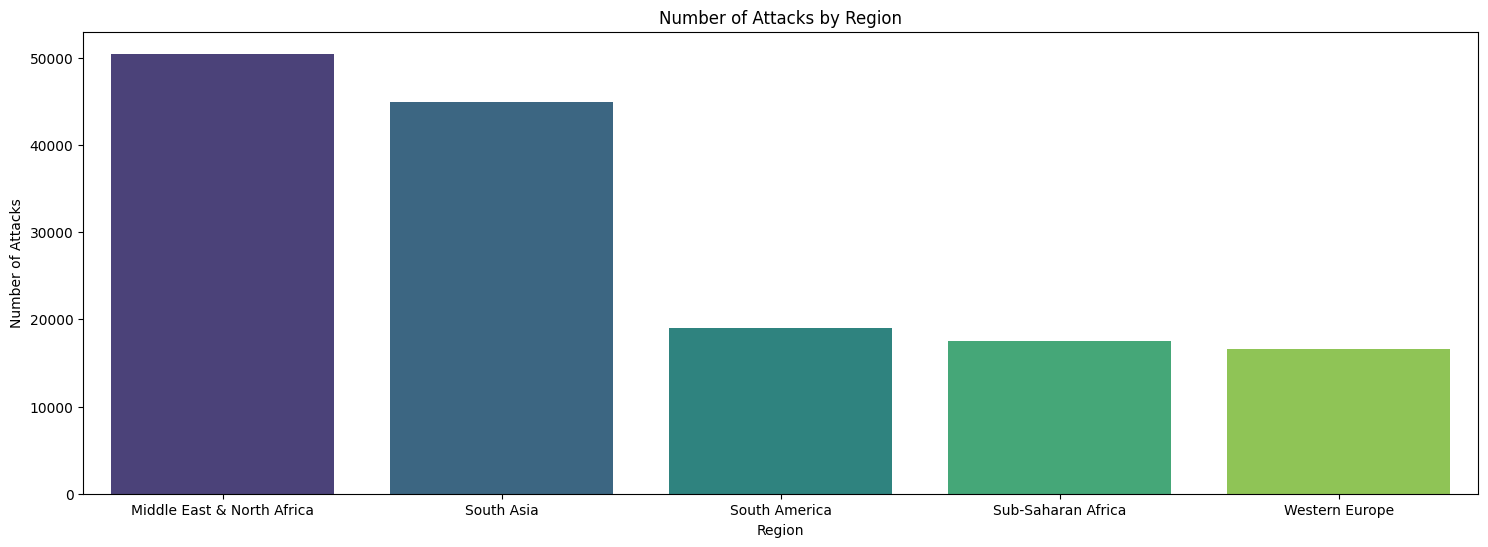

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
colors = sns.color_palette("viridis", len(most_affected_countries_df))

# Plot for number of attacks by country
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Number of Attacks', data=most_affected_countries_df, palette=colors, hue='Country')
plt.title("Number of Attacks by Country")
plt.xlabel("Country")
plt.ylabel("Number of Attacks")
plt.show()

# Plot for number of attacks by region
plt.figure(figsize=(18, 6))
sns.barplot(x='Region', y='Number of Attacks', data=most_affected_regions_df, palette="viridis", hue='Region')
plt.title("Number of Attacks by Region")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()


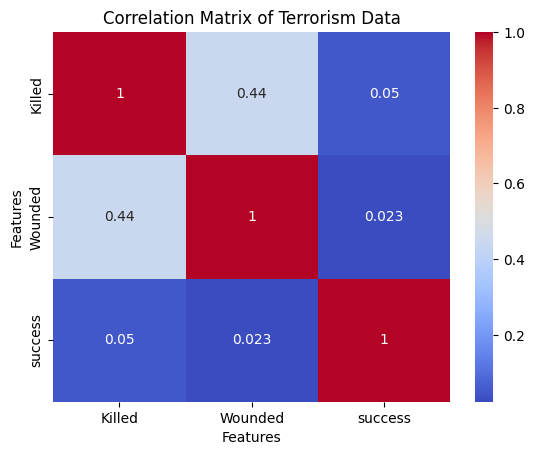

In [55]:
# Heatmap to visualize the correlation between di@erent features.

import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = dx[['Killed','Wounded','success']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Terrorism Data")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


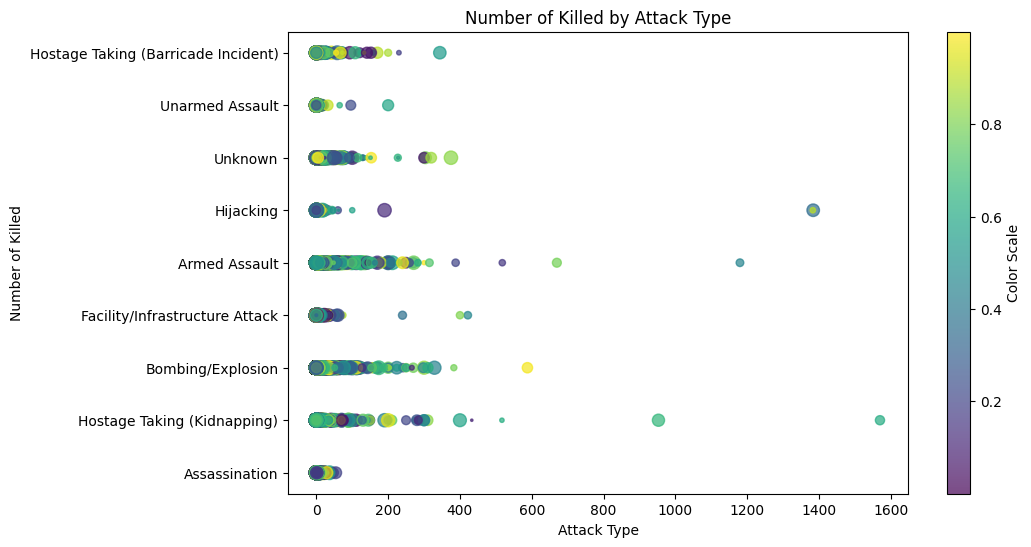

In [56]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
colors = np.random.rand(len(dx['Killed']))
sizes = 100 * np.random.rand(len(dx['Killed']))

plt.figure(figsize=(10, 6))
plt.scatter(x=dx['Killed'], y=dx['AttackType'], c=colors, s=sizes, alpha=0.7, cmap='viridis')
plt.title("Number of Killed by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Number of Killed")
plt.colorbar(label='Color Scale')
plt.show()


***Comparsion between Dask and pandas***

In [30]:
start_time = time.time()
import pandas as pd
test_pd = df.groupby('country').count()
endtime = time.time()
print("--- %s seconds ---" % (endtime - start_time))
import dask.dataframe as dd
dd=dd.from_pandas(df,npartitions=30)
start_time=time.time()
import pandas as pd
test_pd=dd.groupby('country').count()
endtime = time.time()
print("--- %s seconds ---" % (endtime - start_time))


--- 0.4219534397125244 seconds ---
--- 0.05566096305847168 seconds ---


In [68]:
print("Most Country affected",df['Country'].value_counts().index[0])
print("Most City affected:",df['city'].value_counts().index[1])
print("Most Region affected:",df['Region'].value_counts().index[0])
print("Most Year affected",df['Year'].value_counts().index[0])
print("Most Month affected:",df['Month'].value_counts().index[0])
print("Most Group affected",df['Group'].value_counts().index[2])
print("Most Attack Types:",df['AttackType'].value_counts().index[0])

Most Country affected Iraq
Most City affected: Baghdad
Most Region affected: Middle East & North Africa
Most Year affected 2014
Most Month affected: 5
Most Group affected Islamic State of Iraq and the Levant (ISIL)
Most Attack Types: Bombing/Explosion
